In [1]:

import pandas as pd

In [2]:
brinjal = pd.read_csv('/kaggle/input/fruits-and-vegetables/brinjal.csv')
cauliflower = pd.read_csv('/kaggle/input/fruits-and-vegetables/cauliflower.csv')
mosambi = pd.read_csv('/kaggle/input/fruits-and-vegetables/mosambi.csv')
pineapple = pd.read_csv('/kaggle/input/fruits-and-vegetables/pineapple.csv')

In [3]:
print(brinjal.shape)
print(cauliflower.shape)
print(mosambi.shape)
print(pineapple.shape)

(72, 3)
(72, 3)
(72, 3)
(72, 3)


In [4]:
brinjal.head()

,year,month,Average of Price
0,2012,1,22.120000
1,2012,2,18.304348
2,2012,3,22.230769
3,2012,4,25.947368
4,2012,5,26.370370


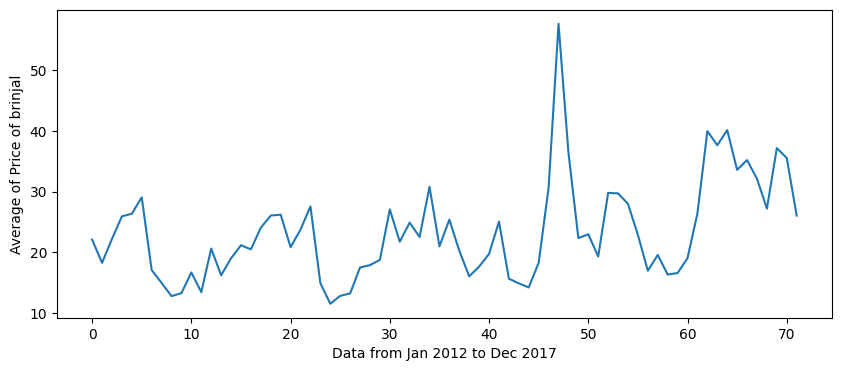

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.plot(brinjal['Average of Price'])  
plt.xlabel("Data from Jan 2012 to Dec 2017")

plt.ylabel("Average of Price of brinjal")
plt.show()

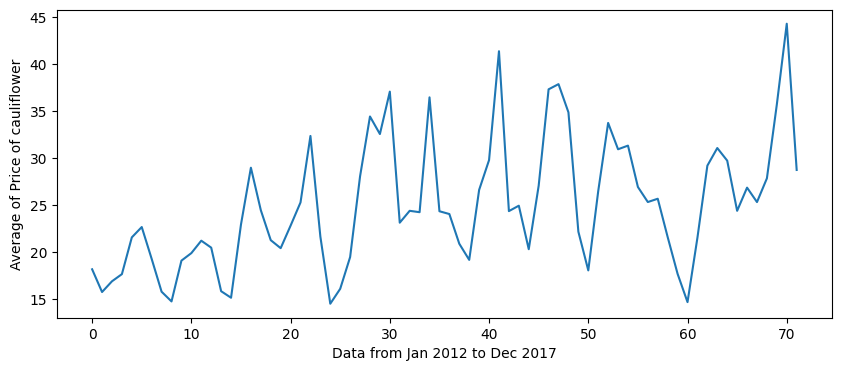

In [6]:
plt.figure(figsize=(10, 4))
plt.plot(cauliflower['Average of Price'])  
plt.xlabel("Data from Jan 2012 to Dec 2017")

plt.ylabel("Average of Price of cauliflower")
plt.show()

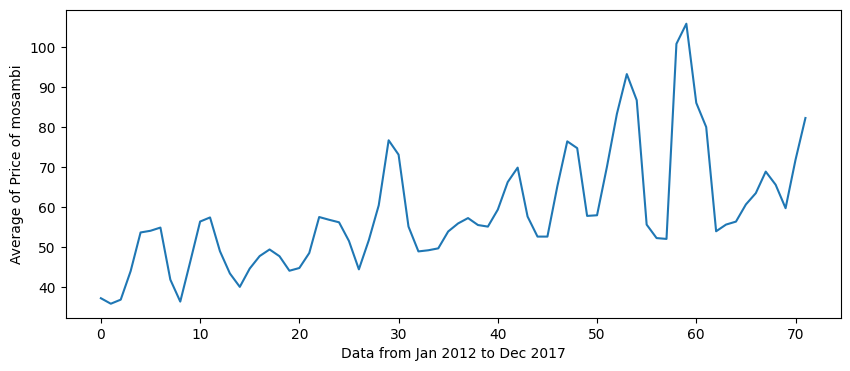

In [7]:
plt.figure(figsize=(10, 4))
plt.plot(mosambi['Average of Price'])  
plt.xlabel("Data from Jan 2012 to Dec 2017")

plt.ylabel("Average of Price of mosambi")
plt.show()

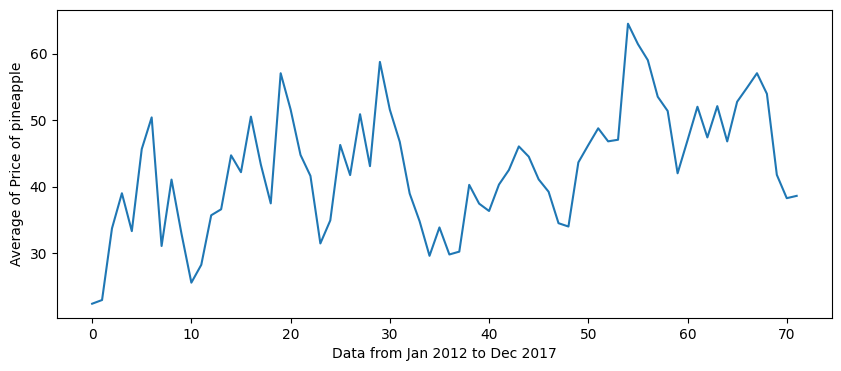

In [8]:
plt.figure(figsize=(10, 4))
plt.plot(pineapple['Average of Price'])  
plt.xlabel("Data from Jan 2012 to Dec 2017")

plt.ylabel("Average of Price of pineapple")
plt.show()

In [9]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [10]:
def adfuller_test(price):
    result=adfuller(price)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [11]:
adfuller_test(pineapple['Average of Price'])

ADF Test Statistic : -3.9936140405222895
p-value : 0.0014443216352318996
#Lags Used : 0
Number of Observations Used : 71
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [12]:
adfuller_test(mosambi['Average of Price'])

ADF Test Statistic : -1.3685740880880957
p-value : 0.5972459650417755
#Lags Used : 4
Number of Observations Used : 67
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [13]:
adfuller_test(cauliflower['Average of Price'])

ADF Test Statistic : -2.132143423969537
p-value : 0.23178748919023356
#Lags Used : 4
Number of Observations Used : 67
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [14]:
adfuller_test(brinjal['Average of Price'])

ADF Test Statistic : -3.809750888195704
p-value : 0.0028091114910259412
#Lags Used : 0
Number of Observations Used : 71
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [15]:
brinjal.isna().sum()

year                0
month               0
Average of Price    0
dtype: int64

In [16]:
cauliflower.isna().sum()

year                0
month               0
Average of Price    0
dtype: int64

In [17]:
mosambi.isna().sum()

year                0
month               0
Average of Price    0
dtype: int64

In [18]:
pineapple.isna().sum()

year                0
month               0
Average of Price    0
dtype: int64

In [19]:
cauliflower['Seasonal First Difference']=cauliflower['Average of Price']-cauliflower['Average of Price'].shift(12)

In [20]:
cauliflower

,year,month,Average of Price,Seasonal First Difference
0,2012,1,18.200000,NaN
1,2012,2,15.782609,NaN
2,2012,3,16.923077,NaN
3,2012,4,17.684211,NaN
4,2012,5,21.592593,NaN
...,...,...,...,...
67,2017,8,25.346154,-1.603846
68,2017,9,27.869565,2.519565
69,2017,10,35.720000,10.020000
70,2017,11,44.307692,22.682692


In [21]:
adfuller_test(cauliflower['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.1923844488522928
p-value : 0.020429750857685742
#Lags Used : 11
Number of Observations Used : 48
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [22]:
mosambi['Seasonal First Difference']=mosambi['Average of Price']-mosambi['Average of Price'].shift(12)

In [23]:
mosambi

,year,month,Average of Price,Seasonal First Difference
0,2012,1,37.160000,NaN
1,2012,2,35.782609,NaN
2,2012,3,36.800000,NaN
3,2012,4,43.947368,NaN
4,2012,5,53.615385,NaN
...,...,...,...,...
67,2017,8,68.846154,13.267206
68,2017,9,65.555556,13.345029
69,2017,10,59.692308,7.692308
70,2017,11,71.782609,-29.035573


In [24]:
adfuller_test(mosambi['Seasonal First Difference'].dropna())

ADF Test Statistic : -4.403133629832556
p-value : 0.00029306507117555385
#Lags Used : 1
Number of Observations Used : 58
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: >

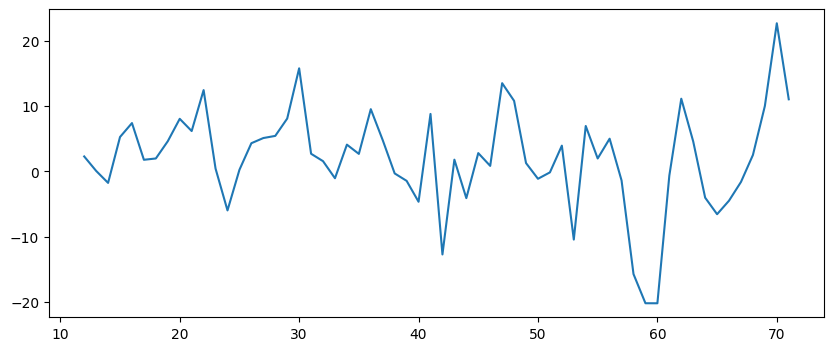

In [25]:
plt.figure(figsize=(10, 4))
cauliflower['Seasonal First Difference'].plot()

<Axes: >

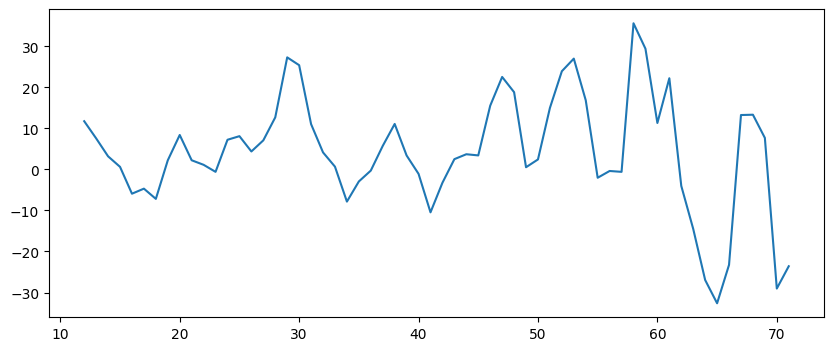

In [26]:
plt.figure(figsize=(10, 4))
mosambi['Seasonal First Difference'].plot()

In [27]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

In [28]:
cauliflower['Seasonal First Difference']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
        ...    
67    -1.603846
68     2.519565
69    10.020000
70    22.682692
71    11.045714
Name: Seasonal First Difference, Length: 72, dtype: float64

In [29]:
cauliflower['Seasonal First Difference'].dropna()

12     2.300000
13     0.086957
14    -1.749164
15     5.277328
16     7.407407
17     1.787692
18     1.988604
19     4.629630
20     8.057391
21     6.187692
22    12.455000
23     0.440000
24    -5.961538
25     0.255435
26     4.326087
27     5.115385
28     5.444444
29     8.098947
30    15.790660
31     2.709402
32     1.576667
33    -1.038462
34     4.105000
35     2.690370
36     9.535613
37     4.791667
38    -0.300000
39    -1.436923
40    -4.636752
41     8.805668
42   -12.702341
43     1.807692
44    -4.083333
45     2.810769
46     0.853333
47    13.514245
48    10.810541
49     1.283333
50    -1.120000
51    -0.140000
52     3.952308
53   -10.424615
54     6.963211
55     1.988462
56     5.016667
57    -1.380000
58   -15.708333
59   -20.170330
60   -20.176282
61    -0.634783
62    11.137391
63     4.590909
64    -4.010000
65    -6.543333
66    -4.467826
67    -1.603846
68     2.519565
69    10.020000
70    22.682692
71    11.045714
Name: Seasonal First Difference, dtype: 

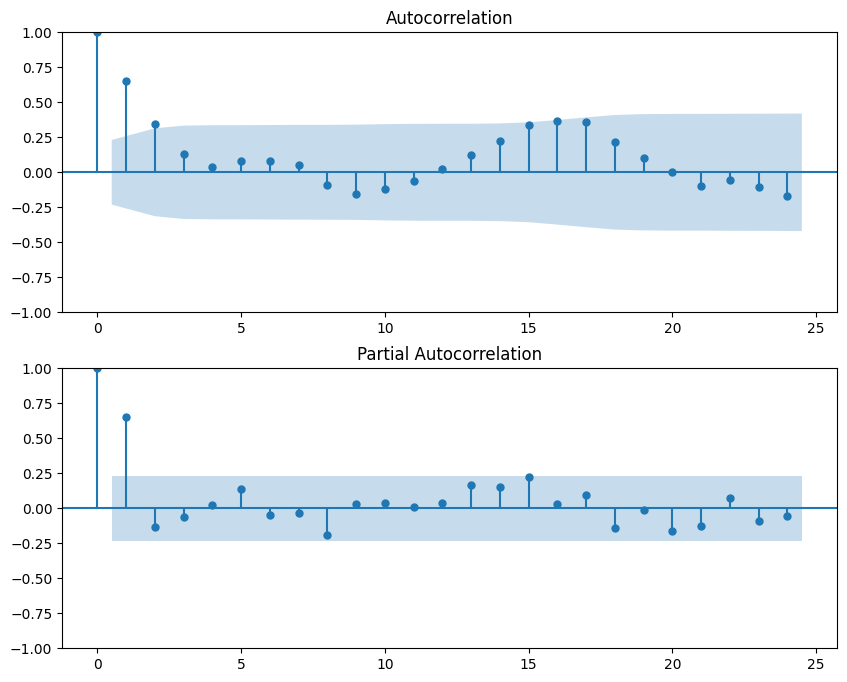

In [30]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(brinjal['Average of Price'].dropna(),lags=24,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(brinjal['Average of Price'].dropna(),lags=24,ax=ax2)

In [31]:
model=sm.tsa.statespace.SARIMAX(brinjal['Average of Price'],order=(2, 0, 2),seasonal_order=(2,0,2,12))
results=model.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.96612D+00    |proj g|=  1.36132D+01

At iterate    5    f=  3.38897D+00    |proj g|=  1.16070D-01

At iterate   10    f=  3.32380D+00    |proj g|=  2.68671D-02

At iterate   15    f=  3.31667D+00    |proj g|=  2.13007D-02

At iterate   20    f=  3.30817D+00    |proj g|=  1.40357D-02

At iterate   25    f=  3.30679D+00    |proj g|=  7.59624D-03

At iterate   30    f=  3.30526D+00    |proj g|=  2.53481D-02

At iterate   35    f=  3.30437D+00    |proj g|=  3.31038D-03

At iterate   40    f=  3.30419D+00    |proj g|=  3.08880D-03

At iterate   45    f=  3.30404D+00    |proj g|=  8.58734D-03

At iterate   50    f=  3.30384D+00    |proj g|=  6.11113D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: >

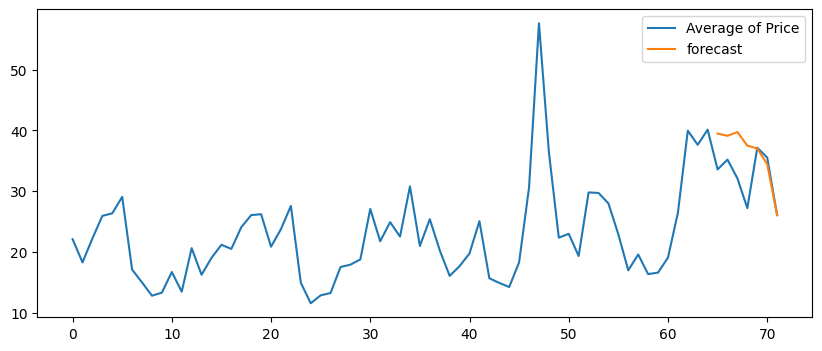

In [32]:
brinjal['forecast']=results.predict(start=65,end=71,dynamic=True)
brinjal[['Average of Price','forecast']].plot(figsize=(10,4))

In [33]:
brinjal.tail(10)

,year,month,Average of Price,forecast
62,2017,3,39.956522,NaN
63,2017,4,37.636364,NaN
64,2017,5,40.125000,NaN
65,2017,6,33.583333,39.476203
66,2017,7,35.200000,39.112328
67,2017,8,32.115385,39.729133
68,2017,9,27.217391,37.496409
69,2017,10,37.160000,37.034313
70,2017,11,35.538462,34.452785
71,2017,12,26.080000,26.069350


In [34]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [35]:
brinjal_error = sqrt(mean_squared_error(brinjal.loc[65:71,'Average of Price'], brinjal.loc[65:71,'forecast']))

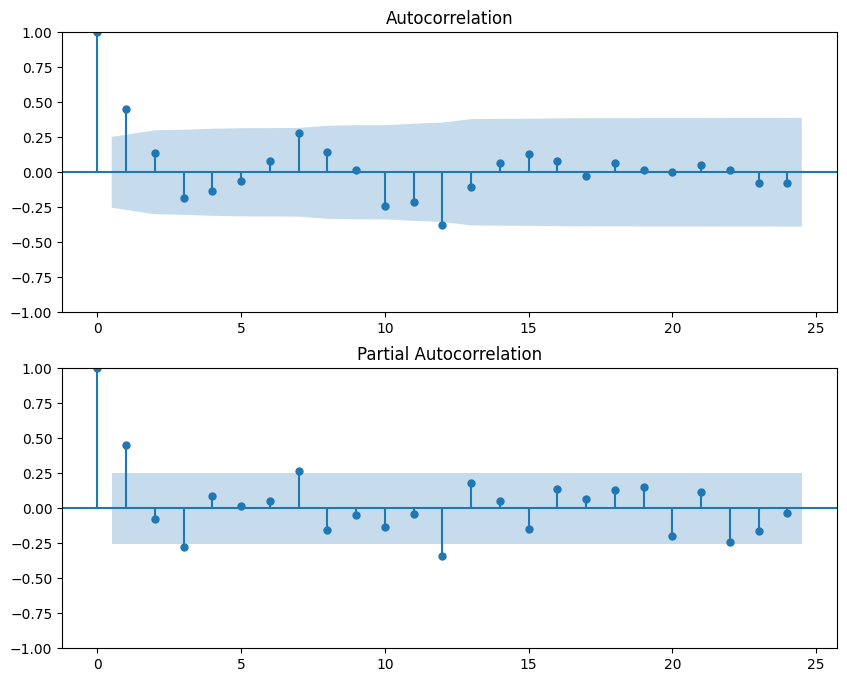

In [36]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(cauliflower['Seasonal First Difference'].dropna(),lags=24,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(cauliflower['Seasonal First Difference'].dropna(),lags=24,ax=ax2)

In [37]:
model=sm.tsa.statespace.SARIMAX(cauliflower['Average of Price'],order=(2, 1, 2),seasonal_order=(2,1,2,12))
results=model.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.16965D+00    |proj g|=  6.86570D-01

At iterate    5    f=  2.58276D+00    |proj g|=  5.16282D-02

At iterate   10    f=  2.49802D+00    |proj g|=  4.78969D-02

At iterate   15    f=  2.46710D+00    |proj g|=  1.20091D-02

At iterate   20    f=  2.46447D+00    |proj g|=  6.23614D-03

At iterate   25    f=  2.46241D+00    |proj g|=  1.86439D-02

At iterate   30    f=  2.46141D+00    |proj g|=  2.62993D-03

At iterate   35    f=  2.46139D+00    |proj g|=  4.28255D-04

At iterate   40    f=  2.46139D+00    |proj g|=  1.82464D-03

At iterate   45    f=  2.46120D+00    |proj g|=  9.74286D-03

At iterate   50    f=  2.46112D+00    |proj g|=  6.98080D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: >

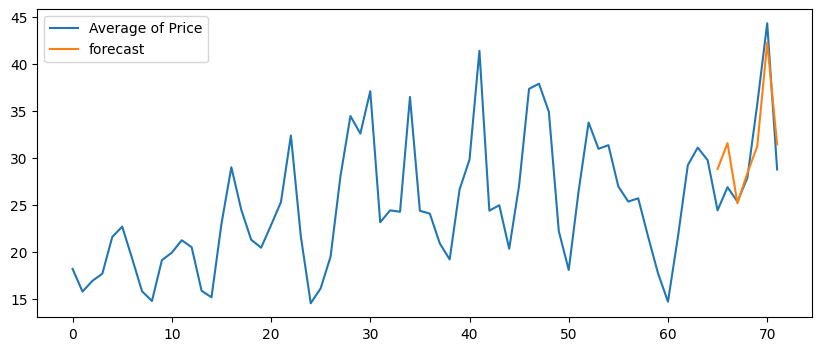

In [38]:
cauliflower['forecast']=results.predict(start=65,end=71,dynamic=True)
cauliflower[['Average of Price','forecast']].plot(figsize=(10,4))

In [39]:
cauliflower_error = sqrt(mean_squared_error(cauliflower.loc[65:71,'Average of Price'], cauliflower.loc[65:71,'forecast']))

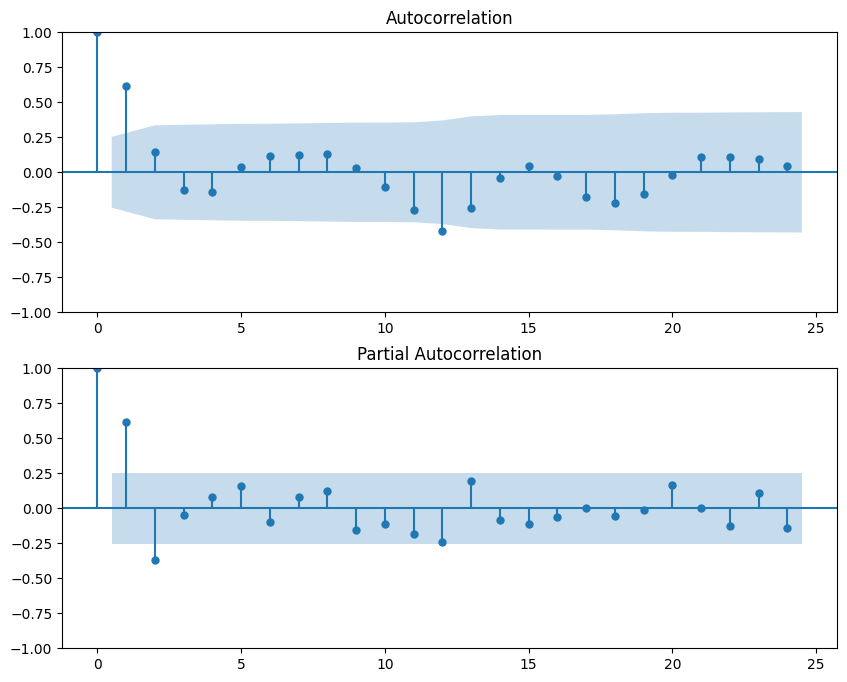

In [40]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(mosambi['Seasonal First Difference'].dropna(),lags=24,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(mosambi['Seasonal First Difference'].dropna(),lags=24,ax=ax2)

In [41]:
model=sm.tsa.statespace.SARIMAX(mosambi['Average of Price'],order=(2, 1, 2),seasonal_order=(2,1,2,12))
results=model.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.09403D+00    |proj g|=  2.60824D-01

At iterate    5    f=  2.99353D+00    |proj g|=  3.08793D-02

At iterate   10    f=  2.93119D+00    |proj g|=  1.67799D-02

At iterate   15    f=  2.92709D+00    |proj g|=  4.12381D-03

At iterate   20    f=  2.92444D+00    |proj g|=  6.55553D-03

At iterate   25    f=  2.92303D+00    |proj g|=  8.29224D-03

At iterate   30    f=  2.92261D+00    |proj g|=  8.74766D-04

At iterate   35    f=  2.92247D+00    |proj g|=  1.03663D-03

At iterate   40    f=  2.92243D+00    |proj g|=  1.06443D-03

At iterate   45    f=  2.92242D+00    |proj g|=  3.23340D-04

At iterate   50    f=  2.92242D+00    |proj g|=  4.01898D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: >

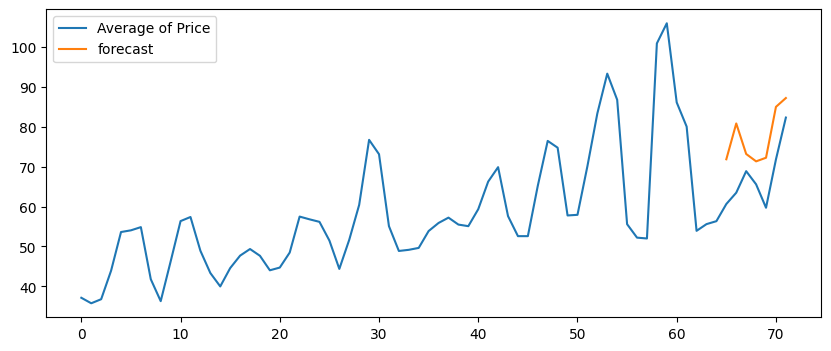

In [42]:
mosambi['forecast']=results.predict(start=65,end=71,dynamic=True)
mosambi[['Average of Price','forecast']].plot(figsize=(10,4))

In [43]:
mosambi_error = sqrt(mean_squared_error(mosambi.loc[65:71,'Average of Price'], mosambi.loc[65:71,'forecast']))

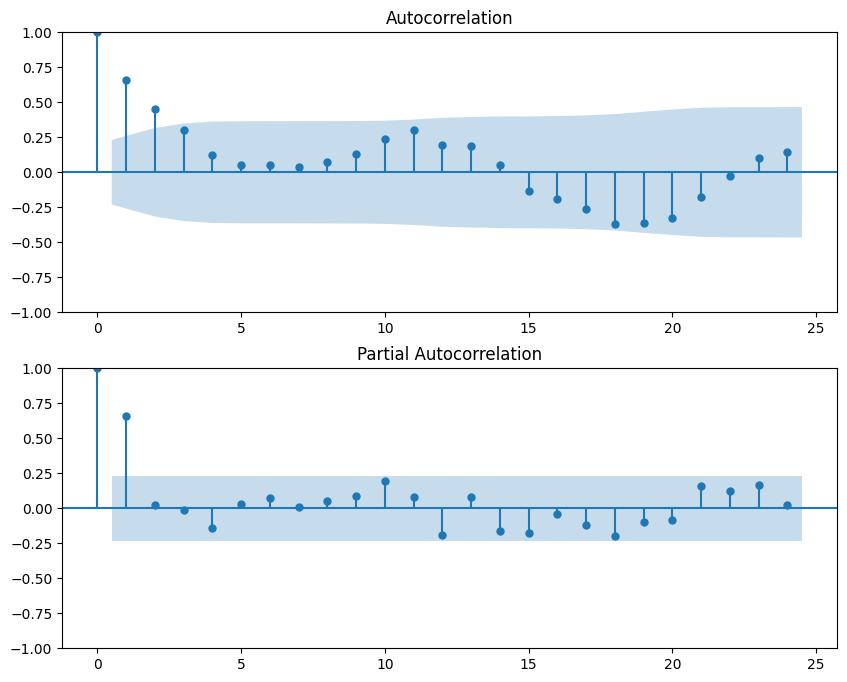

In [44]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(pineapple['Average of Price'].dropna(),lags=24,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(pineapple['Average of Price'].dropna(),lags=24,ax=ax2)

In [45]:
model=sm.tsa.statespace.SARIMAX(pineapple['Average of Price'],order=(2, 0, 2),seasonal_order=(2,0,2,12))
results=model.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.55462D+01    |proj g|=  4.45853D+01

At iterate    5    f=  3.42978D+00    |proj g|=  3.02840D-01

At iterate   10    f=  3.29765D+00    |proj g|=  2.32543D-02

At iterate   15    f=  3.28499D+00    |proj g|=  1.66925D-02

At iterate   20    f=  3.26890D+00    |proj g|=  6.98635D-03

At iterate   25    f=  3.26855D+00    |proj g|=  9.34097D-04

At iterate   30    f=  3.26840D+00    |proj g|=  2.42315D-03

At iterate   35    f=  3.26824D+00    |proj g|=  1.15300D-03

At iterate   40    f=  3.26809D+00    |proj g|=  1.70271D-03

At iterate   45    f=  3.26783D+00    |proj g|=  2.24416D-03

At iterate   50    f=  3.26776D+00    |proj g|=  3.70450D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: >

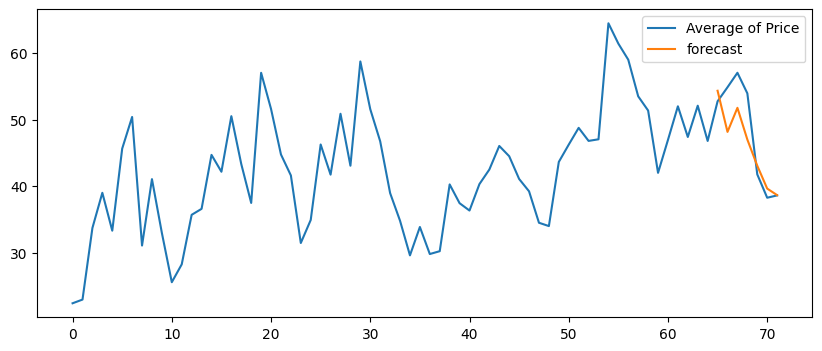

In [46]:
pineapple['forecast']=results.predict(start=65,end=71,dynamic=True)
pineapple[['Average of Price','forecast']].plot(figsize=(10,4))

In [47]:
pineapple_error = sqrt(mean_squared_error(pineapple.loc[65:71,'Average of Price'], pineapple.loc[65:71,'forecast']))

In [48]:
print ("Pineapple_error", pineapple_error," ","mosambi_error", mosambi_error, " ","cauliflower_error", cauliflower_error, " ", "brinjal_error", brinjal_error)

Pineapple_error 4.260725656952305   mosambi_error 10.894182829085493   cauliflower_error 3.227290185839358   brinjal_error 5.540167551177736


In [49]:
Avg_Error = (pineapple_error + mosambi_error + cauliflower_error + brinjal_error)/4

In [50]:
print("Avg RMSE:", Avg_Error)

Avg RMSE: 5.980591555763723
